## Section B: Neural Network vs. Perceptron
In this part, you apply a 3-layer Neural Network on a synthetically generated data to compare its performance with Perceptron. Here, we are looking for your explanation about the differences between perceptron and NN that leads to different results.



### Question 2: Neural Network’s Decision Boundary:
> ##### 1. Loading the Datasets and omiting the null values.

In [1]:
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

In [2]:
# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

In [3]:
# Read the datasets
set.seed(1234)          # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
T1[T1==1] <- +1         # convert 1 labels to +1
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1
T2[T2==1] <- +1         # convert 1 labels to +1


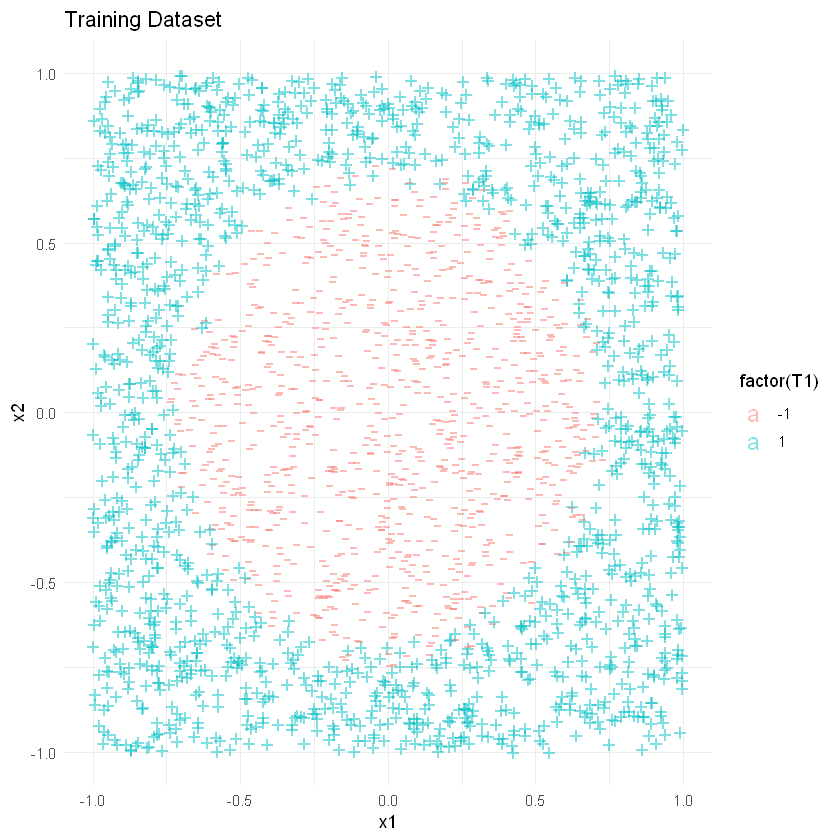

In [4]:
#importing library for plotting
#install.packages('ggplot2')
library(ggplot2)
label0=1   #label for +1
label1=-1  #label for -1
#converting to dataframe for plotting 
temp_df= as.data.frame(X1)
#Plotting the dataset
ggplot(temp_df, aes(x=x1, y=x2, color=factor(T1), label=ifelse(T1==label0, '+', '-'))) + geom_text(size = 5, alpha=0.5) +
                    ggtitle ('Training Dataset') + theme_minimal()

##### The above plot gives us the picture of how the dataset is spread, i.e if the dataset is linearly separable or not. And hence, we can clearly see that it cannot be separated using a linear model. Below we will check if perceptron or neural network will be a better choice to classify the above dataset.

> ##### 2. Perceptron

In [5]:
#to find out error rate between true and predicted labels 
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

In [6]:
## perceptron prediction function
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}

In [7]:
## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}

In [8]:
## Perceptron Build function
perceptron.build <- function(X1, T1, eta=0.01, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}

[1] "The weights are: "


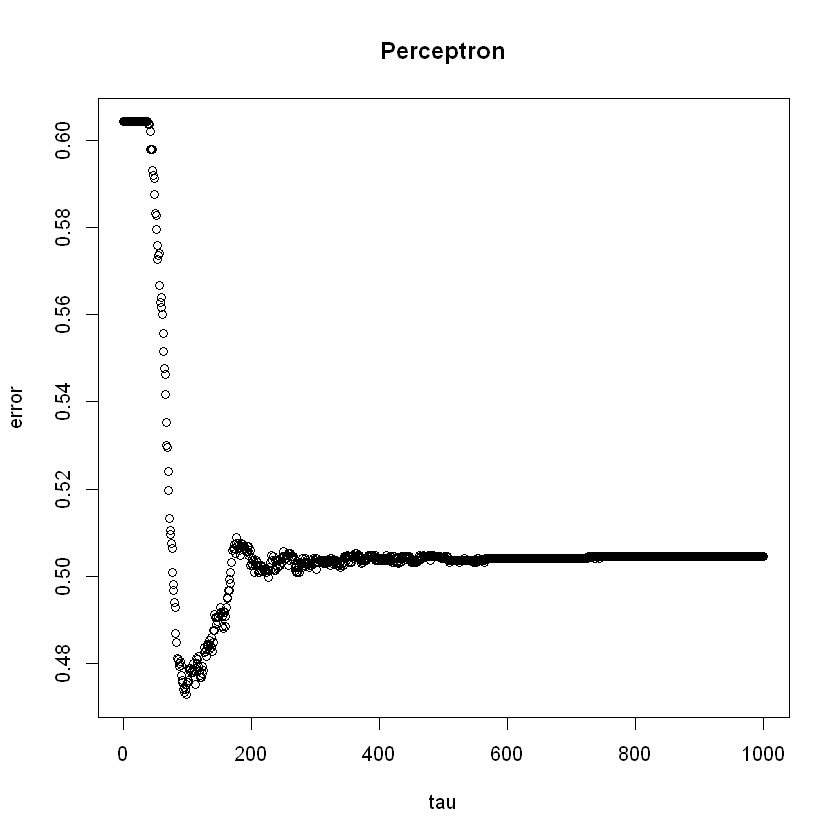

In [9]:
# Building and ploting the train error curve, run it few times.
print('The weights are: ')
W <- perceptron.build(X1, T1, tau.max=1000, plotting=TRUE)

In [10]:
# Creating Phi matrix 
Phi <- as.matrix(cbind(1, X2)) 
# converting phi to data frame
Phi_df = as.data.frame(Phi)
labels_pred <- perceptron.predict(Phi,W)
ER <- error.rate(labels_pred,T2)
paste("Perceptron Test Error is: ",ER)

[1] "Perceptron Test Error is:  0.5168"

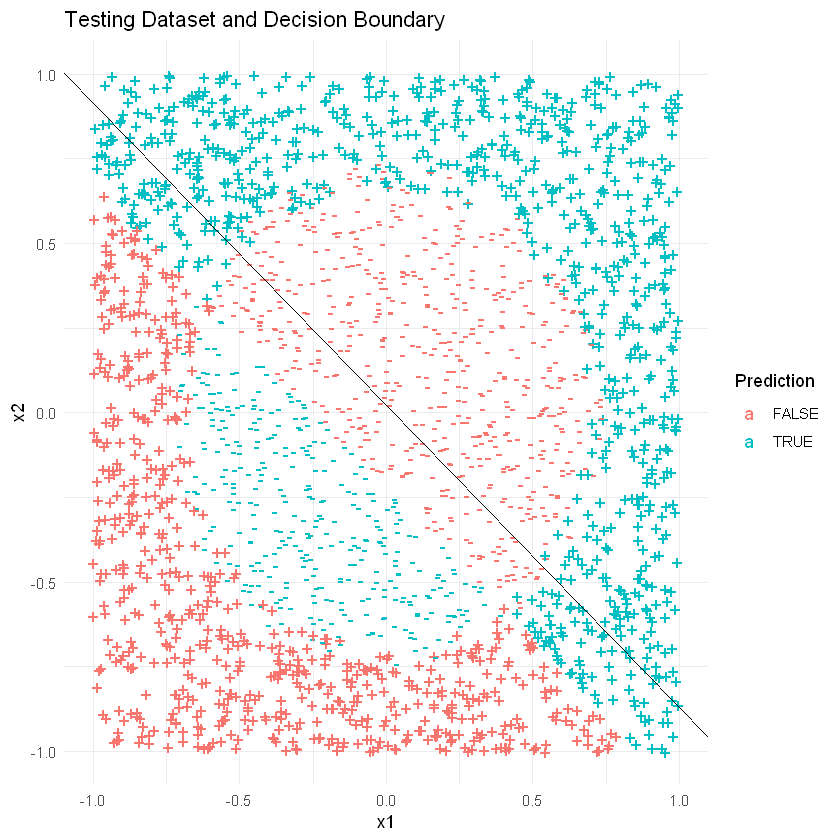

In [11]:
# Visualizations
label0 <- +1
label1 <- -1
## Plotting the decision boundary
ggplot(data=Phi_df, aes(x=x1, y=x2, label=ifelse(T2!=label1, '+', '-'), color=factor(labels_pred*T2>0))) +
    geom_text() +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    geom_abline(intercept=W[1], slope=-W[2]/W[3]) +
    ggtitle('Testing Dataset and Decision Boundary') +
    theme_minimal()

We can notice above that, the perceptron has pretty badly classified the data. Above, the blue ones are true predicted or correctly predicted labels whereas the red ones are false labels. The perceptron model has classified the dataset using a line diagonally, which is of no one, and hence we can firmly conclude that perceptron is no good when the data is linearly non-separable.

> ##### 3. 3-Layer Neural Networks

Functions for activation, derivative of activation and class probabilities

In [12]:
## the activation function (tanh here)
h <- function(z, a=1) { #activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}

In [13]:
## the derivitive of the activation function (tanh here)
h.d <- function(z, a=1) {
  return (1-(h(z, a))^2)
}

In [14]:
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}

In [15]:
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

In [16]:
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}

In [17]:
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

In [19]:
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  #if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)    
  
  # Initializing Weights and Bias matrix to zero
  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
      ## record the errors
 # if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
 # plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')
  return(list(W1, W2, b1, b2))
}
      


In [20]:
# Creating a matrix to store the test error 
error_matrix <- matrix(NA,nrow=55, ncol=2)

# Train and Test Data
X1.transpose <- t(as.matrix(X1))
X2.transpose <- t(as.matrix(X2))

# Looping by increasing 2 units from the Hidden Layer
for (k in seq(2, 100, 2)) {
  list[W1, W2, b1, b2]<- nn.build(k, X1.transpose, T1, plotting=TRUE, epoch.max=1000,eta = 0.1, lambda = 0.01)
  error_matrix[k/2,1] <- k
  error_matrix[k/2,2] <- error.rate(nn.predict(X2.transpose, W1, W2, b1, b2, threshold=0), T2)
}
# Removing empty rows 
error_matrix <- error_matrix[complete.cases(error_matrix),]

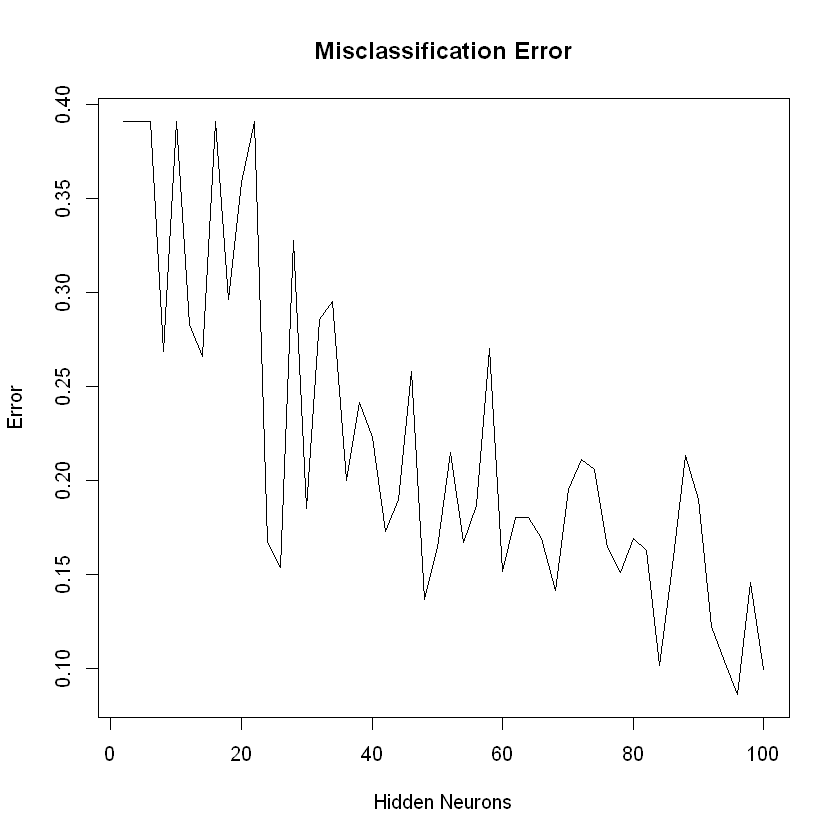

In [21]:
plot(error_matrix[,1], error_matrix[,2],type = 'l', xlab = 'Hidden Neurons', ylab = 'Error', main = 'Misclassification Error')

>##### 4. Report of the error rates obtrained by the perceptron and all variants of NN.

In [31]:
error_df <-  as.data.frame(error_matrix)
names(error_df) <- c("k", "Error")
cat("Percepreon Test error is:",ER)
min_err = min(error_df['Error'])
cat("\nNN test error is  ", min_err)

Percepreon Test error is: 0.5168
NN test error is   0.086

In [33]:
error_df

k,Error
2,0.3908
4,0.3908
6,0.3908
8,0.2684
10,0.3908
12,0.2828
14,0.2656
16,0.3908
18,0.2960
20,0.3584


In [26]:
# now running the NN with 96 hidden units, that is our optimum neural units:
#transposing training data
X1.transpose <- t(as.matrix(X1))
#transposing testing data
X2.transpose <- t(as.matrix(X2))

#running the nn build function exclusively for 96 units.
list[W1, W2, b1, b2]<- nn.build(96, X1.transpose, T1, plotting=TRUE, epoch.max=1000, eta = 0.1, lambda = 0.01)

#saving the predicted labels
predicted_labels<-t(nn.predict(X2.transpose, W1, W2, b1, b2, threshold=0))

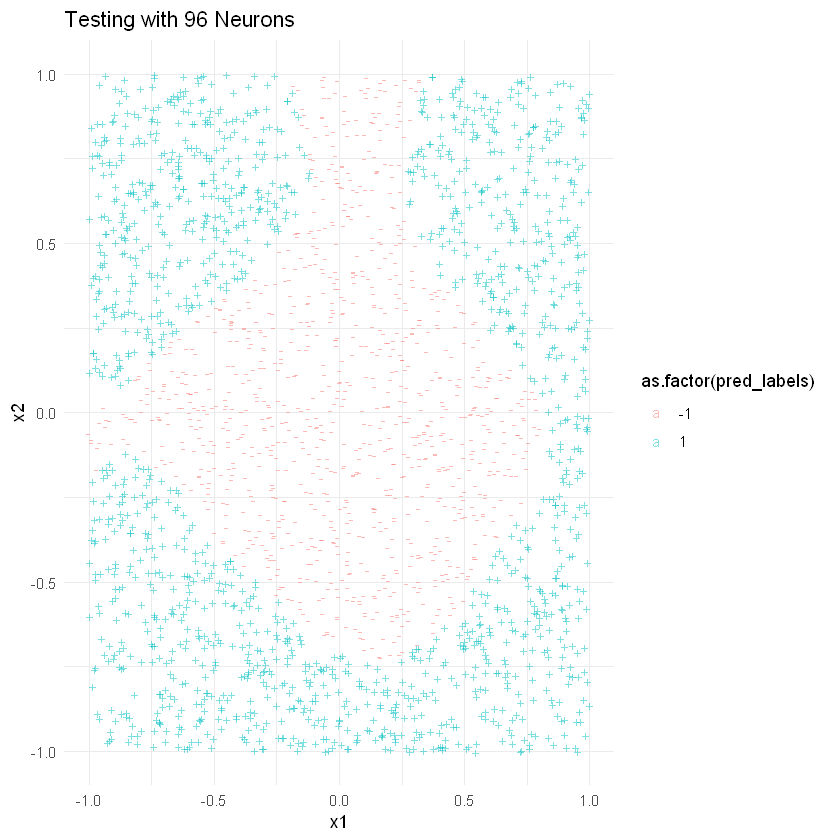

In [29]:
#plotting the classification done by our NN with 96 neurons
ggplot(data=X2, aes(x=x1, y=x2, color=as.factor(predicted_labels), label=ifelse(pred_labels==+1, '+', '-'))) +
    geom_text(size = 3, alpha=0.5) +  ggtitle('Testing with 96 Neurons') + theme_minimal()

>##### 5. Reasons responsible for such difference between perceptron and 3-Layer NN

- Looking at the above Neural Network, we can see and have also stated that 96 would be the optimum number, since it is giving the least error of 0.086 which is lot better than the error found with perceptron.
- Hence, we can say that our Neural Network did a better job than our perceptron in classifying the data.
- We also realised that, perceptron cannot be used to classify non-linear data or cannot implement any arbitrary nonlinear function.
- The input is projected to weights and scaled along direction resulting in the linear operation.
- The perceptron we used here is a single layer, and with research there are many multi-layer perceptrons which can successfully classify non-linear data, which is as goood as NN. 
- Steps reduces into unary value and hence we cannot implement nonlinear function in perceptron.
- The neural network is superior to perceptron, since it uses a activation function such as sigma, tanh or RELU.